ДР4. Проверка статистических гипотез.
Задача 2.
====================

Нам нужно сравнить процент муниципальных служащих, состоящих в профсоюзах, в разных штатах в зависимости от того, был ли принят закон State right-to-work law в штате или нет.

In [ ]:
# специальная штука, чтоб считывать с гугл-диска
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#  matplotlib.style.use('ggplot')
%matplotlib inline

In [ ]:
from scipy import stats

In [ ]:
# удобная штука для печати двух гистограмм на 1 странице
def two_histograms(x, y):
    """
    Функция, которая построит две гистограммы на одной картинке.
    Дополнительно пунктирными линиями указываются средние значения выборок.
    x: вектор pd.Series,
    y: вектор pd.Series
    """
    x.hist(alpha=0.5, weights=[1./len(x)]*len(x))
    y.hist(alpha=0.5, weights=[1./len(y)]*len(y))
    plt.axvline(x.mean(), color='red', alpha=0.8, linestyle='dashed')
    plt.axvline(y.mean(), color='blue', alpha=0.8, linestyle='dashed')
    plt.legend([x.name, y.name])

In [ ]:
import os
os.chdir("/content/drive/My Drive/colab/AD/Data")


In [ ]:
df = pd.read_csv('data2', sep='\s+')

In [ ]:
df.head()

,STATE,DENS,COMP,RTW,PVT
0,NY,56.9,1,0,31.2
1,MI,49.6,1,0,30.2
2,WA,32.4,1,0,33.1
3,HI,54.6,1,0,24.7
4,AK,30.7,1,0,30.1


Сохраним в отдельные переменные выборки, которые собираемся сравнивать.

In [ ]:
x = df[df['RTW'] == 1]['DENS']
y = df[df['RTW'] == 0]['DENS']
x.name, y.name = 'RTW_1', 'RTW_0'

Теперь проверим оба распределения на нормальность. Пусть гипотеза H0 - распределение нормальное, H1 - распределение отклонено от нормального. Теперь проверим гипотезы для наших распределений. Сначала посмотрим на гистограммы.

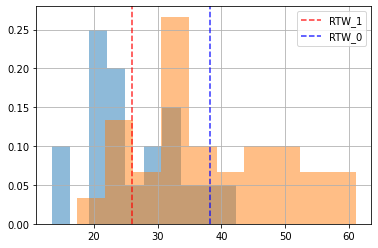

In [ ]:
two_histograms(x, y)

По сравнению с результатом прошлой задачи, красиво: больше похоже на купола, правда, есть отдельный столбик в синей гистограмме, но я не назвала бы его выбросом, есть какая-то симметрия, хоть и с отклонением. Зато тут средние значения сильнее отличаются друг от друга. Посмотрим на распределения по-отдельности.

(array([2., 0., 5., 4., 1., 2., 3., 1., 1., 1.]),
 array([13.4 , 16.29, 19.18, 22.07, 24.96, 27.85, 30.74, 33.63, 36.52,
        39.41, 42.3 ]),
 <a list of 10 Patch objects>)

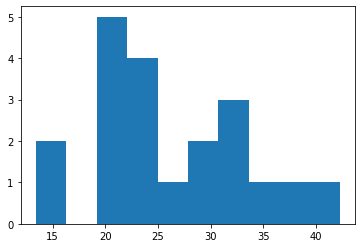

In [ ]:
plt.hist(x)

Отдельный столбик, но на выброс не похож. Симметрия хромает, куполообразная форма - непонтно. Может, увеличить количество столбцов?

(array([2., 0., 0., 3., 4., 2., 0., 2., 1., 2., 1., 1., 1., 0., 1.]),
 array([13.4       , 15.32666667, 17.25333333, 19.18      , 21.10666667,
        23.03333333, 24.96      , 26.88666667, 28.81333333, 30.74      ,
        32.66666667, 34.59333333, 36.52      , 38.44666667, 40.37333333,
        42.3       ]),
 <a list of 15 Patch objects>)

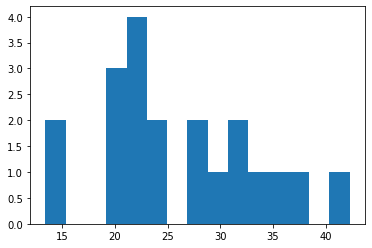

In [ ]:
plt.hist(x, bins = 15)

Ситуация понятней не стала. Может, уменьшить количество столбцов?

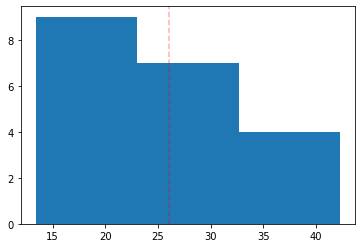

In [ ]:
plt.hist(x, bins = 3)
plt.axvline(x.mean(), color='red', alpha=0.3, linestyle='dashed')  # добавили среднее значение

Ну, совсем ничего не понятно! Вроде, не похоже на колокол. Но у нас такое маленькое количество испытаний! Надо построить колокол и посмотреть!

In [ ]:
mu = np.mean(x)
sigma = np.std(x)

#  Решетка точек для построения графика функции
x_1 = np.linspace(np.min(x), np.max(x), 10)

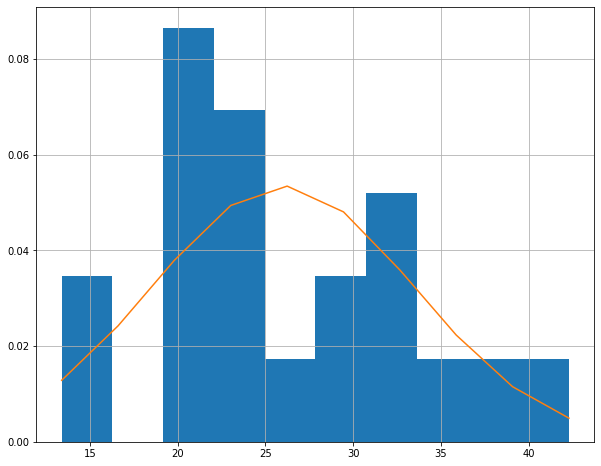

In [ ]:
#  Построим гистограмму
#  Добавим график плотности нормального распределения

plt.figure(figsize=(10,8))
pd.Series(x).hist(bins=10, density=1)
plt.plot(x_1, stats.norm.pdf(x_1, mu, sigma))

#  Пример добавления подписей на графике
#plt.text(2.0, 0.9, r'$f(x) = \frac{\exp(-(x-\mu)^2/2*\sigma^2)}{\sigma*\sqrt{2*\pi}}$',
#        fontsize=12)

#  plt.savefig("KDE_pres_05.png")

Сложно. В принципе, если сдвинуть самый высокий столбец в центр...

Посмотрим тогда пока что y:

(array([1., 4., 2., 8., 3., 2., 3., 3., 2., 2.]),
 array([17.4 , 21.77, 26.14, 30.51, 34.88, 39.25, 43.62, 47.99, 52.36,
        56.73, 61.1 ]),
 <a list of 10 Patch objects>)

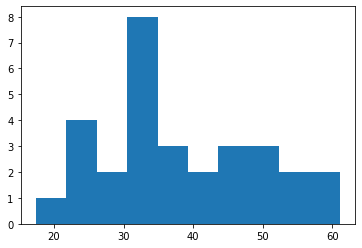

In [ ]:
plt.hist(y)

Тут, вроде, получше. Есть какая-то форма, по симметрии отклонение небольшое, совсем нет выбросов. Но всё равно - я еще не уверена.  Может, уменьшить количество столбцов?

(array([ 5., 10.,  5.,  6.,  4.]),
 array([17.4 , 26.14, 34.88, 43.62, 52.36, 61.1 ]),
 <a list of 5 Patch objects>)

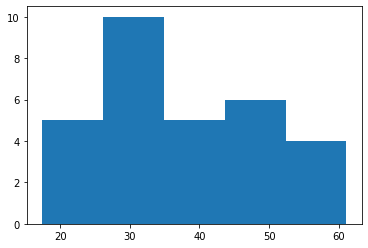

In [ ]:
plt.hist(y, bins = 5)

Вот. Вот, вроде, красиво, но всё равно ничего не понятно. Нарисуем график нормального распределения с такими же параметрами и сравним!

In [ ]:
mu = np.mean(y)
sigma = np.std(y)

#  Решетка точек для построения графика функции
x_1 = np.linspace(np.min(y), np.max(y), 10)

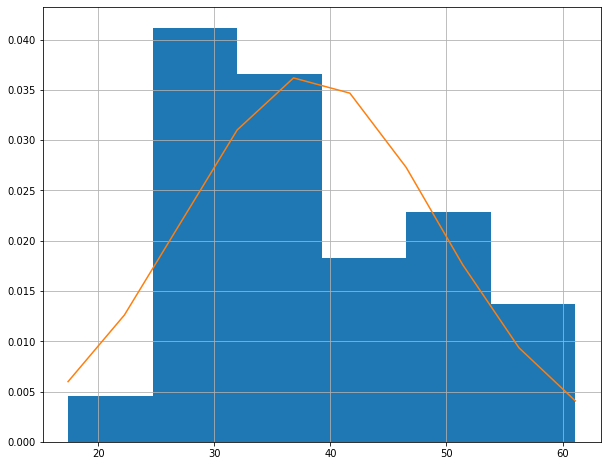

In [ ]:
#  Построим гистограмму
#  Добавим график плотности нормального распределения

plt.figure(figsize=(10,8))
pd.Series(y).hist(bins=6, density=1)
plt.plot(x_1, stats.norm.pdf(x_1, mu, sigma))


Мне кажется, что это похоже на нормальное распределение! Во всяком случае, это - максимально нормальное из всех гистограмм, построенных мною ранее.

## Что же делать?

Посмотрим, что скажет на это Питон. Гипотеза H0: распределение нормальное. Н1 - имеются отклонения от нормального. Воспользуюсь критерием Шапиро-Уилка, чтобы проверить гипотезу для каждого распределения.

In [ ]:
res1 = stats.shapiro(x)
print('Для переменной x p-value: ', res1[1])

res2 = stats.shapiro(y)
print('Для переменной y p-value: ', res2[1])

Для переменной x p-value:  0.6463996171951294
Для переменной y p-value:  0.19173066318035126


Отлично!

p-value получился для обоих распределений большим(как для критерия 𝛼=0.001, так и для 𝛼=0.05). Гипотеза о том, что распределение нормальное, не отвергается.  Будем считать, что распределение нормальное.

Проверяем гипотезу о равенстве средних значений. H0 - средние значения отличаются незначительно, отличия вызваны случайными отклонениями. H1 - отличаются значительно.

Сначала критерием Флигнера-Килина проверим, равны ли дисперсии.

In [ ]:
res = stats.fligner(x, y)
print('p-value: ', res[1])

p-value:  0.12569758439648201


Значение p-value больше уровня значимости 0.05 (и тем более, 0.01 и 0.001), поэтому гипотезу о равенстве дисперсий не отвергаем. В двух выборках находятся разные  объекты, значит выборки независимые. Вывод: гипотезу о равенстве средних значений будем проверять с помощью ```ttest_ind``` с опцией ```equal_var=True```.

In [ ]:
res = stats.ttest_ind(x, y, equal_var=True)
print('p-value: ', res[1])

p-value:  9.287017631717846e-05


P-value очень мало, меньше 0.05 и даже 0.001, считаем, что различия в средних значениях процентов муниципальных служащих не вызваны случайными отклонениями! Они отличаются!

In [ ]:
#А посмотрим, сколько было всего значений в выборках:

print('Закон принят - ', len(x))
print('Не принят - ', len(y))
print('Всего - ', len(df))

Закон принят -  20
Не принят -  30
Всего -  50


Тоже мало значений, но на этот раз получилось понятнее. Значения былы распределены по нормальному закону. Особенно это хорошо было видно на тех штатах, в которых закон не принят, наверно, потому что их в полтора раза больше.

In [ ]:
print('Среднее значение для штатов, в которых закон принят, составляет', x.mean(), 'процентов' )
print('Среднее значение для штатов, в которых закон не принят, составляет', y.mean(), 'процентов' )

Среднее значение для штатов, в которых закон принят, составляет 26.005000000000003 процентов
Среднее значение для штатов, в которых закон не принят, составляет 38.19666666666667 процентов


Text(0.5, 0.98, '')

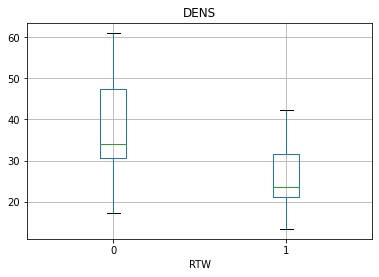

In [33]:
b_p = df.boxplot(column='DENS', by='RTW')
b_p.get_figure().suptitle('')

##Главный вывод: мы отвергли гипотезу о том, что значения процентов муниципальных случащих в среднем одинаковые. В штатах, где закон принят, процент муниципальных служащих меньше, чем в тех штатах, в которых он не принят.